In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

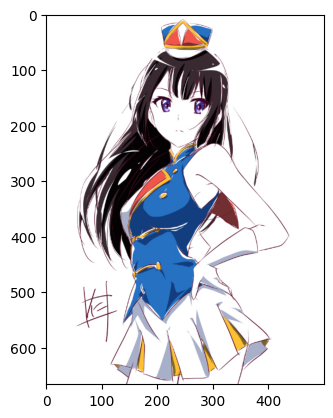

In [2]:
image = cv2.imread("../images/59021351_p0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
map1 = np.zeros(image.shape[:-1], dtype=np.uint8)
map2 = np.zeros(image.shape[:-1], dtype=np.uint8)

In [4]:
r = cv2.remap(
    src=image,
    map1=map1,
    map2=map2,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
# 失败

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:1815: error: (-215:Assertion failed) ((map1.type() == CV_32FC2 || map1.type() == CV_16SC2) && map2.empty()) || (map1.type() == CV_32FC1 && map2.type() == CV_32FC1) in function 'cv::remap'
